In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [83]:
X,y=make_blobs(n_samples=1000,centers=2,random_state=0)


In [92]:
class CustomLinearreg:
    def __init__(self,lr=.01,iters=30):
        self.lr=lr
        self.iters=iters
        
    def fit(self,X,y):
        ones=np.ones((X.shape[0],1))
        X=np.hstack([ones,X])
        
        self.theta=np.random.randn(X.shape[1],1)
        errors=[]
        for i in range(self.iters):
            error=self.gradient_desc(X,y)
            errors.append(error)
        return errors
    
    def gradient_desc(self,X,y):
        delta_theta,error=self.gradient(X,y)
        self.theta+=delta_theta
        return error
    
    def gradient(self,X,y):
        y=y.reshape(-1,1)
        yh=self.hypothesis(X)
        dneglldt=np.dot(X.T,(yh-y))/X.shape[0]
        error = -np.mean((y * np.log(yh)) + ((1-y)*(np.log(1-yh))))
        
        return -dneglldt*self.lr ,error
        
    def hypothesis(self,X):
        g=np.dot(X,self.theta)
        return 1/(1+np.exp(-g))
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        result = self.hypo(X)
        return (result.flatten() > .5).astype(int)
    
    def score(self, X, y):
        yp = self.predict(X)
        
        return np.mean(yp == y)

In [93]:
model= CustomLinearreg(iters=1000)

In [94]:
error=model.fit(X,y)

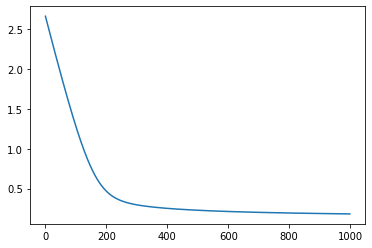

In [95]:
plt.plot(error)